In [27]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
print (tf.__version__)
print (keras.__version__)
#import keras_utils
#from keras_utils import reset_tf_session
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

1.13.1
2.2.4


In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [29]:
print ("Training Samples: ", X_train.shape, y_train.shape)
print ("Test Samples: ", X_test.shape, y_test.shape)

Training Samples:  (50000, 32, 32, 3) (50000, 1)
Test Samples:  (10000, 32, 32, 3) (10000, 1)


In [30]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
print (cifar10_classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [0]:
X_train2 = X_train/255 - 0.5
X_test2 = X_test/255 - 0.5

y_train2 = to_categorical(y_train, num_classes=10)
y_test2 = to_categorical(y_test, num_classes=10)

In [16]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [0]:
INIT_LR = 5e-3
BATCH_SIZE = 32
EPOCHS = 10

model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [0]:
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch
  
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [34]:
model.fit(
    X_train2, y_train2,  # prepared data
    batch_size=32,
    epochs=10,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory()],
    
    validation_data=(X_test2, y_test2),
    shuffle=True,
    verbose=0
)

Learning rate: 0.005
Learning rate: 0.0045
Learning rate: 0.00405
Learning rate: 0.003645
Learning rate: 0.0032805
Learning rate: 0.00295245
Learning rate: 0.002657205
Learning rate: 0.0023914846
Learning rate: 0.002152336
Learning rate: 0.0019371024


In [0]:
y_pred_test = model.predict_proba(X_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [0]:
model.save_weights("weights.h5")
model.load_weights("weights.h5")

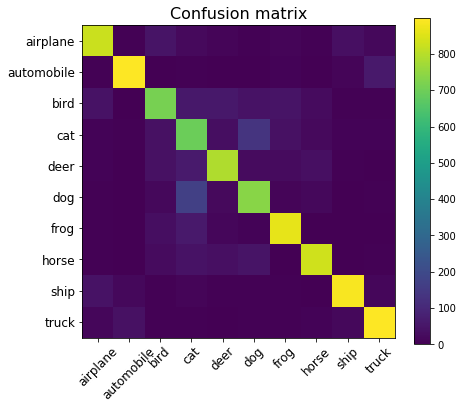

Test accuracy: 0.8145


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))